In [52]:
import seaborn as sns
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

In [53]:
titanic = sns.load_dataset("titanic")

features = ["pclass", "sex", "fare", "embarked", "age"]
target = ["survived"]

# Handle missing data
imp_median = SimpleImputer(strategy="median")
titanic[["age"]] = imp_median.fit_transform(titanic[["age"]])

imp_freq = SimpleImputer(strategy="most_frequent")
titanic[["embarked", "deck", "embark_town"]] = imp_freq.fit_transform(titanic[["embarked", "deck", "embark_town"]])

# Encode
le = LabelEncoder()

titanic["sex"] = le.fit_transform(titanic["sex"])
titanic["embarked"] = le.fit_transform(titanic["embarked"])

X = titanic[features]
# y = titanic[target]
y = titanic["survived"]

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)

In [17]:
# Decision Tree
model = DecisionTreeClassifier(
    max_depth = 4,
)
model.fit(X_train, y_train)

y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

print("Training Accuracy: ", accuracy_score(y_train, y_pred_train)*100, "%")
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test)*100, "%")
# Classic case of overfitting

Training Accuracy:  83.98876404494382 %
Testing Accuracy: 79.88826815642457 %


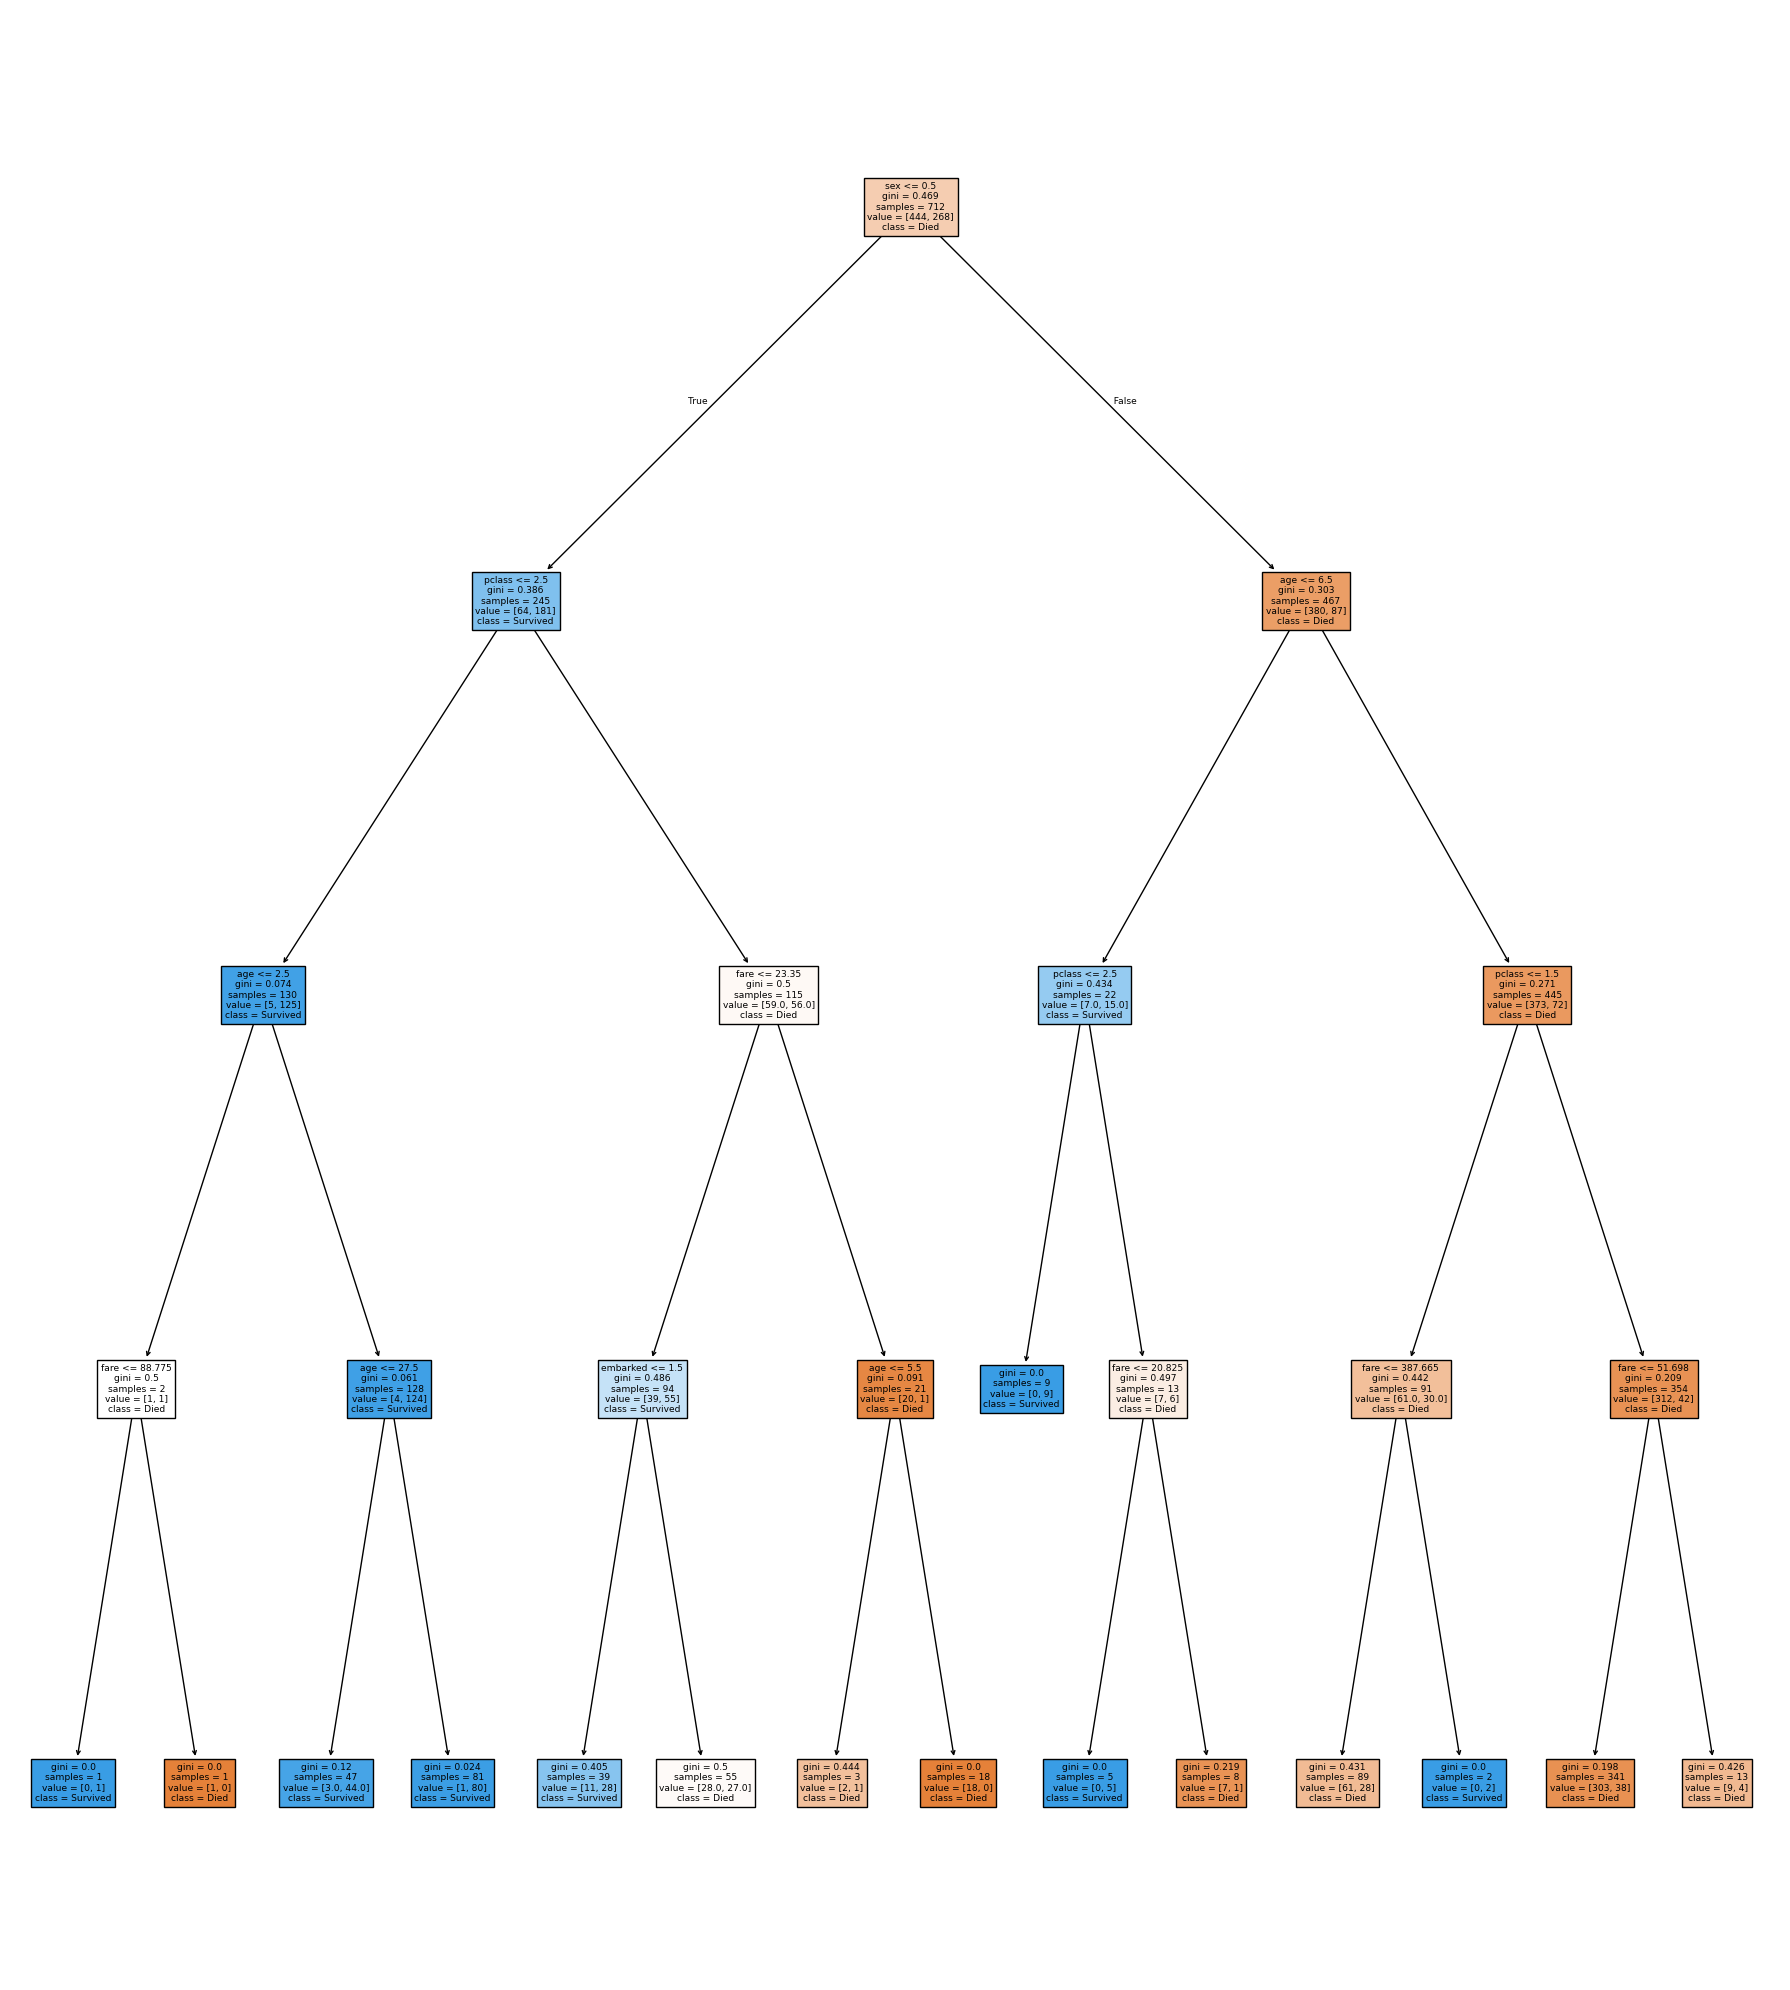

In [18]:
# Graph - Tree
plt.figure(figsize=(18,20))
plot_tree(
    model, 
    feature_names = X.columns,
    class_names = ["Died", "Survived"],
    filled = True,
)

plt.tight_layout()
plt.show()

In [21]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

crf = RandomForestClassifier(
    n_estimators=301,
    oob_score=True,
)

crf.fit(X_train, y_train)

y_pred = crf.predict(X_test)
print("OOD Score: ", crf.oob_score_*100, "%")
print("Testing Accuracy: ", accuracy_score(y_test, y_pred)*100, "%")

OOD Score:  80.19662921348315 %
Testing Accuracy:  79.3296089385475 %


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score

# Features & target
X = titanic.drop("survived", axis=1)
y = titanic["survived"]

# Create dataset
X, y = make_regression(
    n_samples=100,
    n_features=4,
    n_informative=2,
    random_state=0,
    shuffle=False
)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

# Model
regr = RandomForestRegressor(max_depth=2, random_state=0)

# Train
regr.fit(X_train, y_train)

# Predict
y_pred = regr.predict(X_test)

# Evaluate
print("Test R² Score:", r2_score(y_test, y_pred))


Test R² Score: 0.8125601746187278


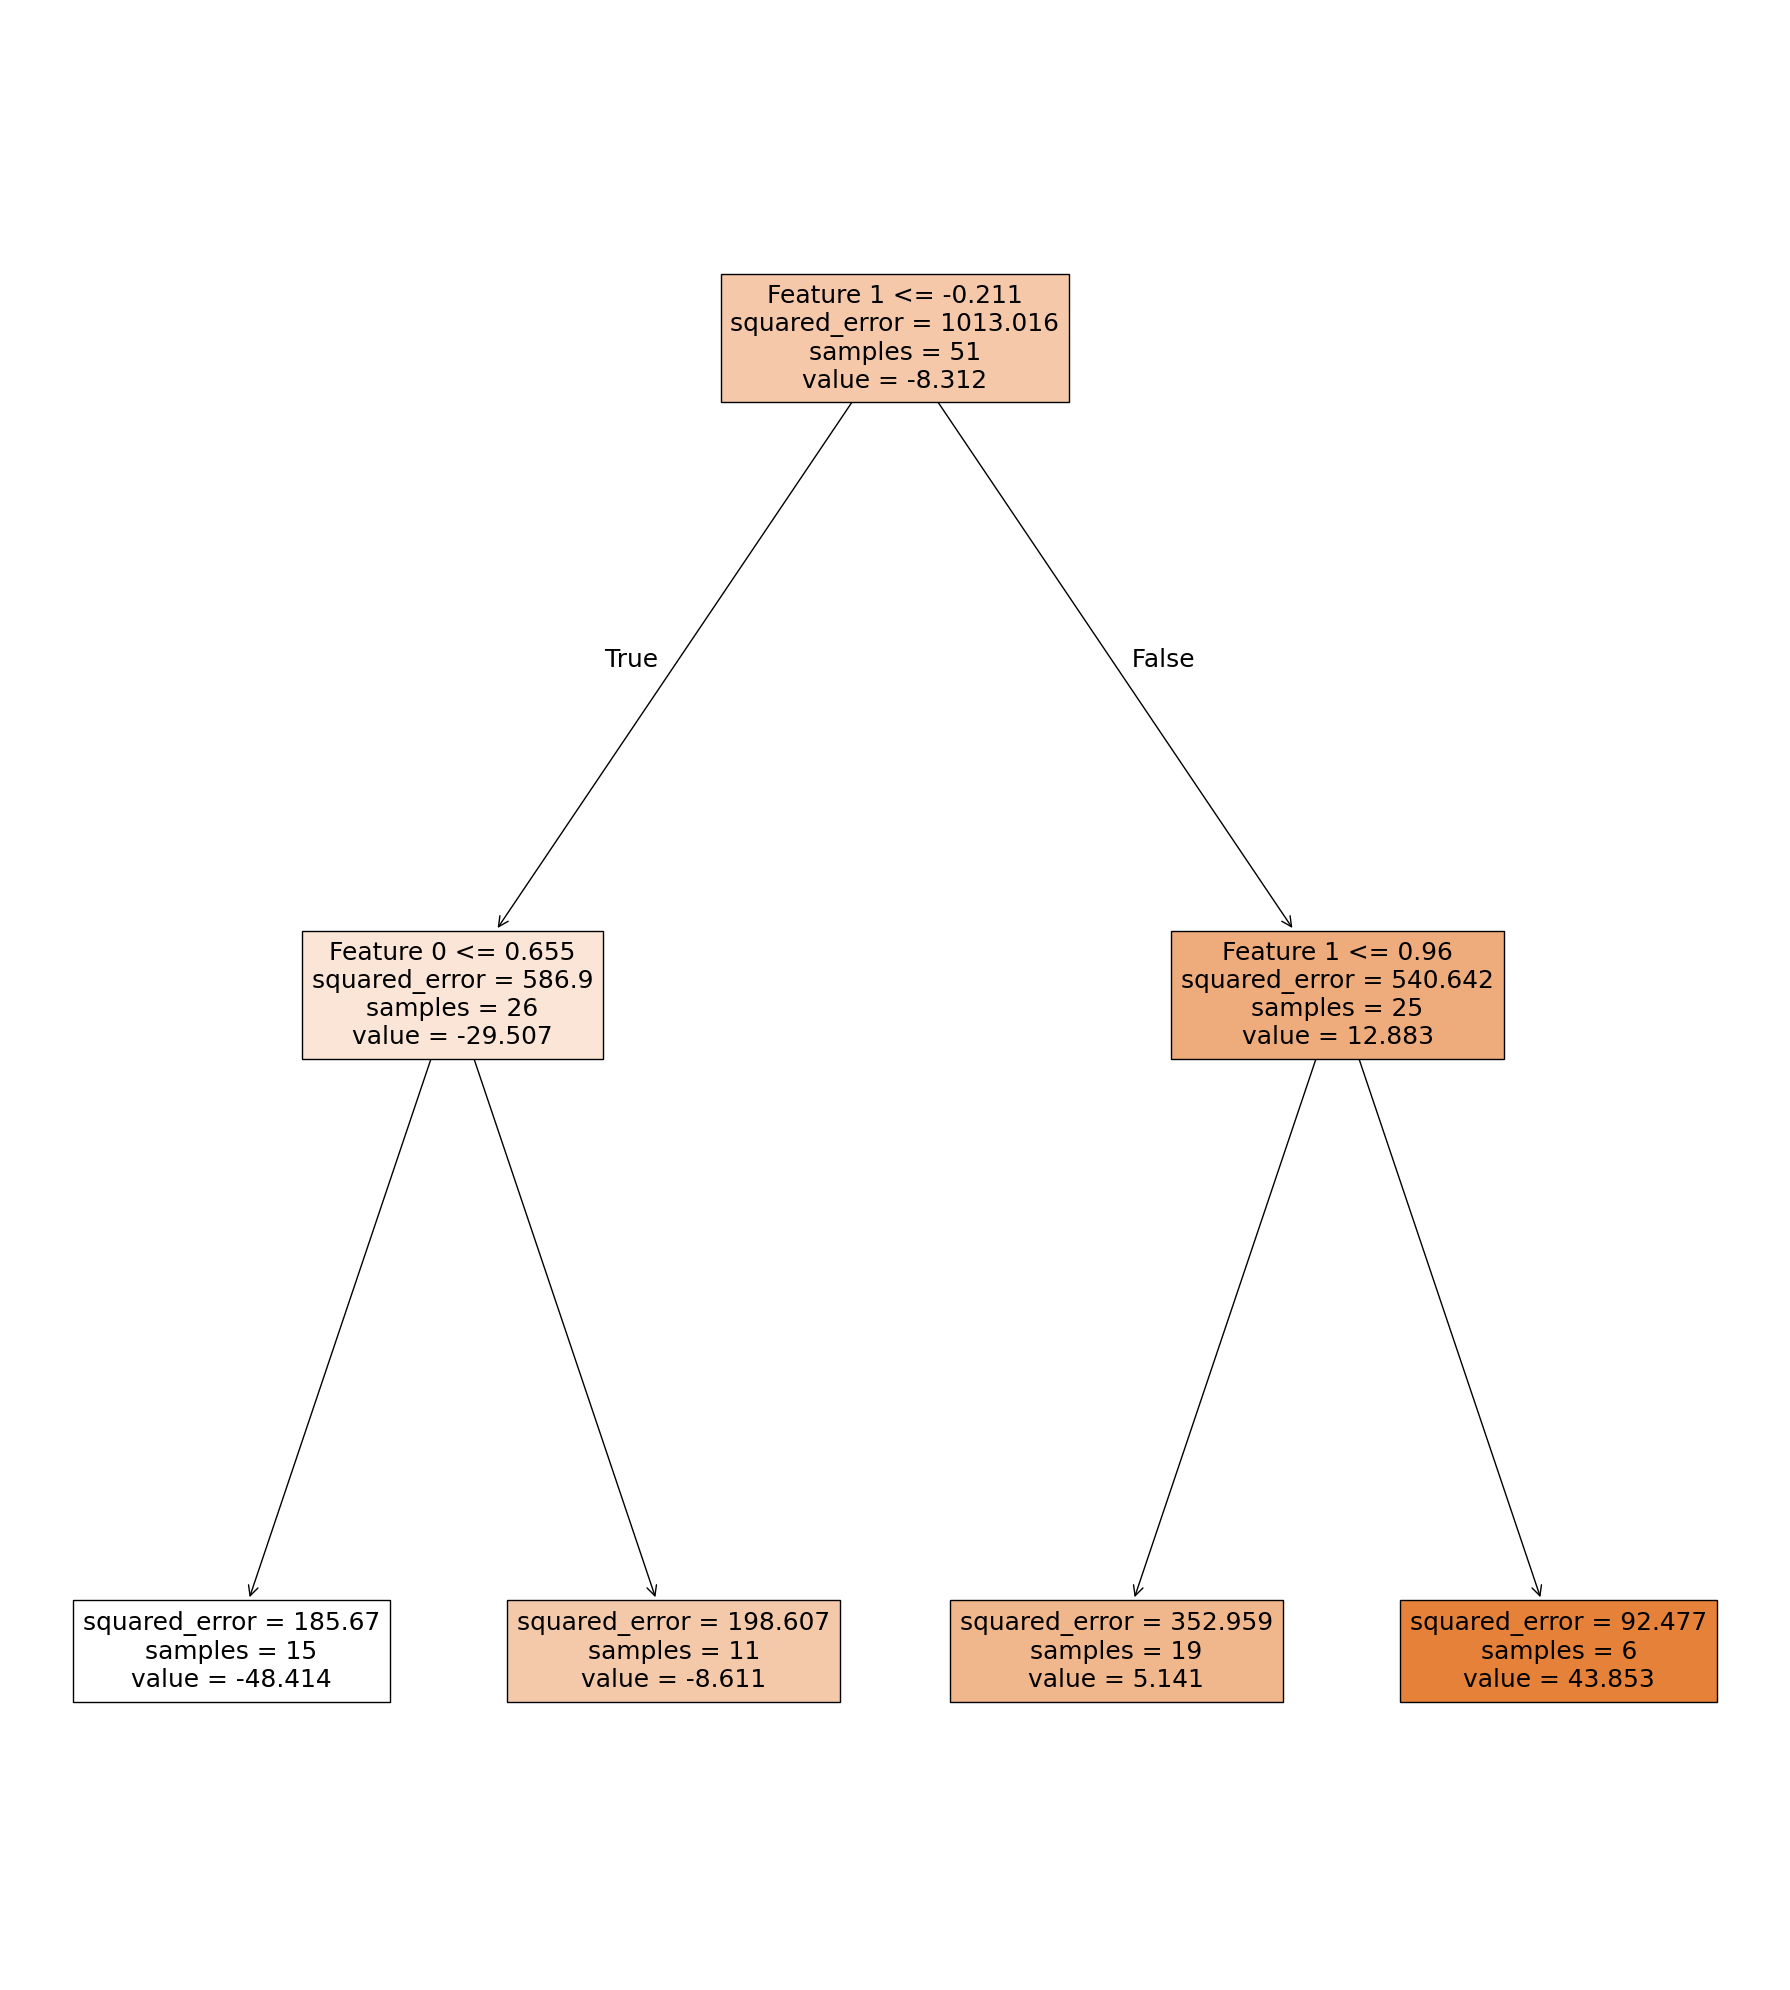

In [39]:
# Graph
plt.figure(figsize=(18, 20))
plot_tree(
    regr.estimators_[0],   # one decision tree
    feature_names=[f"Feature {i}" for i in range(X.shape[1])],
    filled=True
)

plt.tight_layout()
plt.show()

In [ ]:
# Bagging Classification
from sklearn.ensemble import BaggingClassifier

base_model = DecisionTreeClassifier()

Bagging_classifier = BaggingClassifier(
    estimator=base_model,
    n_estimators=501,
    random_state=42
)

Bagging_classifier.fit(X_train, y_train)

y_pred_train = Bagging_classifier.predict(X_train)
y_pred_test = Bagging_classifier.predict(X_test)

print("Training Accuracy:", accuracy_score(y_train, y_pred_train) * 100, "%")
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test) * 100, "%")


Training Accuracy: 97.75280898876404 %
Testing Accuracy: 79.3296089385475 %


In [ ]:
# Bagging Classification (Logistic Regression as base model)
from sklearn.linear_model import LogisticRegression

base_model = LogisticRegression(max_iter=1000)

bagging_regression = BaggingClassifier(
    estimator=base_model,
    n_estimators=501,
    random_state=42
)

bagging_regression.fit(X_train, y_train)

y_pred_train = Bagging_classifier.predict(X_train)
y_pred_test = Bagging_classifier.predict(X_test)

print("Training Accuracy:", accuracy_score(y_train, y_pred_train) * 100, "%")
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test) * 100, "%")


Training Accuracy: 97.75280898876404 %
Testing Accuracy: 79.3296089385475 %
